# Assignment \# 1 - Jupyter Notebook (55 points)

__(Instruction)__ The purpose of this assignment is to make sure you know how to use Jupyter Notebook as a scientific coding environment for python.  Jupyter notebook provides a range of different functions for scientific documentation combined with codes.  

In this assignment, a fully functioning jupyter notebook is provided as a hard copy and you will produce exactly the same jupyter notebook by filling in the cells below in this notebook. 

- The format of text should be exactly the same as the hard copy, including bold face, italics, headers, etc.

- The format of equations should be exactly the same as the hard copy, including italics, non-italics, subscripts, superscripts, etc.

- The figure should be imported properly.

- The codes should work without any error.

__(Due)__  Feb. 03, 2022, 11:59 PM

__Submission__ Upload the *.ipynb file on canvas. Name the file as YourLastName-YourFirstName-HW01.ipynb

__(Where to find the hardcopy)__ It is under the same folder as this notebook.  The name is "assignment_1-hardcopy.html"

***

## Least-Squares Linear Regression

(text: 1 pt)

The example here shows how to conduct least-squares linear regression with python. This is quite common task in scientific data analysis. The notebook you make here can be also a good template to keep for future use for least-squares fitting.

### Background

(text: 4 pts)

In this notebook, we will find a pair of __slope__ and __intercept__ that *minimizes* the sum of the residuals (vertical offsets or distances) for a synthetic dataset.

### Synthesize a dataset

(text: 2 pts; code: 3 pts)

Import some modules.

In [1]:

import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline


The cell below produce a __synthetic dataset__ with randomly generated noise.

In [2]:

rng = np.random.RandomState(123)
mean = [100, 1000]
cov = [[1, 0.9], [0.9, 1]]
sample = rng.multivariate_normal(mean, cov, size=100)
x, y = sample[:, 0], sample[:, 1]


Plot the sythetic dataset.

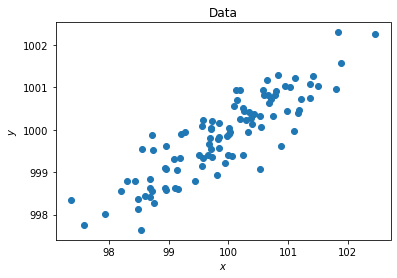

In [3]:

plt.scatter(x, y)
plt.title('Data')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()


### Via Statistics

(text: 1 pt; equation: 10 pts; code 1 pt)

Using statistics:
$$w_1 = \frac{\sigma_{xy}}{\sigma_{x}^{2}}$$
$$b = \bar{y} - w_1\bar{x}$$
where $\sigma_{xy}$ is the covariance, $\sigma_{xy} = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})$, and $\sigma^{2}_{x}$ is the variance, $\sigma^{2}_{x} = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2$, $\bar{x}$ and $\bar{y}$ are the averages of $x$ and $y$, respectively.

In [4]:

cov_xy = np.cov(np.vstack((x, y)), ddof=0)[0, 1]
var_x = np.var(x, ddof=0)
w1 = cov_xy / var_x
b = np.mean(y) - w1*np.mean(x)

print('slope: {:.2f}'.format(w1))
print('y-intercept: {:.2f}'.format(b))


slope: 0.84
y-intercept: 915.59


### Via linear algebra

(text: 1 pt; equation: 1 pt; code: 1 pt)

Analytical solution:
$$w = (X^T X)^{-1} X^T y$$

In [5]:

X = x[:, np.newaxis]

# adding a column vector of "ones"
Xb = np.hstack((np.ones((X.shape[0], 1)), X))
w = np.zeros(X.shape[1])

z = np.linalg.inv(np.dot(Xb.T, Xb))
w = np.dot(z, np.dot(Xb.T, y))
b, w1 = w[0], w[1]

print('slope: {:.2f}'.format(w1))
print('y-intercept: {:.2f}'.format(b))


slope: 0.84
y-intercept: 915.59


### Using a pre-implemented function

(text: 3 pts; code: 1 pt)

You may use the __polyfit__ function in __numpy__.

In [6]:

w = np.polyfit(x, y, deg=1)
b, w1 = w[1], w[0]
print('slope: {:.2f}'.format(w1))
print('y-intercept: {:.2f}'.format(b))


slope: 0.84
y-intercept: 915.59


### Fitting result

(text: 1 pt; code: 1 pt)

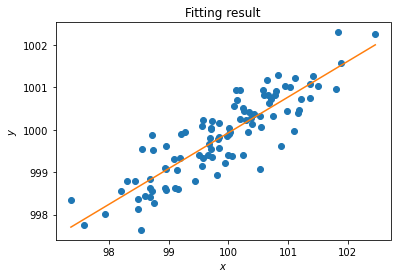

In [7]:

extremes = np.array([np.min(x), np.max(x)])
predict = extremes * w1 + b

plt.plot(x, y, marker='o', linestyle='')
plt.plot(extremes, predict)
plt.title("Fitting result")
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()


### Evaluation of fitting

(text: 3 pts; equation: 4 pts; code: 3 pts)

Mean squared error (MSE):
$$MSE = \frac{1}{n} \sum_{i=1}^{n} \big(y_i - \hat{y}_i\big)^2$$
where $\hat{y}$ is the predicted average $y$ value for a given $x$.

Note that __MSE__ is *scale-dependent*.

In [8]:

y_predicted = x*w1 + b
mse = np.mean((y - y_predicted)**2)
print("Mean squared error = ", mse)


Mean squared error =  0.21920128791623272


Root mean squared error:

In [9]:

rmse = np.sqrt(mse)
print("Root mean spared error", rmse)


Root mean spared error 0.4681893718531346


Plot fit residuals.

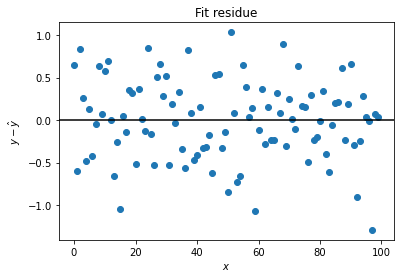

In [10]:

plt.scatter(np.arange(x.shape[0]), y - y_predicted)
plt.ylabel('$y - \hat{y}$')
plt.xlabel('$x$')
plt.title('Fit residue')
plt.axhline(0., color='k')


### Coefficient of determination ($R^2$)

(text: 4 pts; equation: 4 pts; code: 1 pt)

- Total sum of squares (variability of the reponse or target variable, proportional to variance):
$$SS_{total} = \sum_{i=1}^{n} \big( y_i - \bar{y_i} \big)^2$$
- Residual sum of squares:
$$SS_{residual} = \sum_{i=1}^{n} \big( \hat{y}_i - \bar{y}_i \big)^2$$
- Coefficient of determination
$$R^2 = \frac{SS_{residual}}{SS_{total}}$$

In [11]:

mean_y = np.mean(y)
SS_total = np.sum((y - mean_y)**2)
SS_residual = np.sum((y_predicted - mean_y)**2)
r_squared = SS_residual / SS_total
print("Coefficient of determination = ", r_squared)


Coefficient of determination =  0.7665392849276278
